In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    """
        Using Fashion Mnist dataset
        Loading dataset and returning train_images, train_labels, test_images, test_labels
    """
    df_train = pd.read_csv('fashion_mnist\\fashion-mnist_train.csv', delimiter = ',')
    df_test = pd.read_csv('fashion_mnist\\fashion-mnist_test.csv', delimiter = ',')
    train_images = df_train[df_train.columns[1:]].values
    train_labels = df_train['label']   
    test_images = df_test[df_test.columns[1:]].values 
    test_labels = df_test['label']
    return train_images, train_labels, test_images, test_labels
x_train, y_train, x_test, y_test = load_data()

In [3]:
def preprocessing(X):
    """
    Normalizing the inputs
    
    Argument:
    X --> Input array
    
    Returns:
    normal --> Normalized input
    """
    normal = X / 255.
    return normal.T

In [4]:
def one_hot(y, c):
    """
    Turning labels to one hot matrix
    
    Argument:
        y--> label/ground truth.
        c--> Number of classes.
    Returns:
        One hot label
    """
    # A zero matrix of size (m, c)
    y_hot = np.zeros((len(y), c))
    
    # Putting 1 for column where the label is,
    # Using multidimensional indexing.
    y_hot[np.arange(len(y)), y] = 1
    
    return y_hot.T

In [5]:
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [6]:
y_train.shape

(10, 60000)

In [7]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)

In [8]:
x_train.shape

(784, 60000)

In [9]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [10]:
def initialization_paramaters_with_He(n_x, n_h1, n_h2, n_y):
    """
    Initializing parameters using He initialization
    
    Argumens:
        n_x -- size of the input layer
        n_h1 -- size of the first hidden layer
        n_h2 -- size of the secound output layer
        n_y -- size of the output layer
    Returns:
        Parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
                                                    
    """
    parameters = {}
    
    parameters['W1'] = np.random.randn(n_h1, n_x) * np.sqrt(2./n_x)
    parameters['b1'] = np.zeros((n_h1, 1))

    parameters['W2'] = np.random.randn(n_h2, n_h1) * np.sqrt(2./n_h1)
    parameters['b2'] = np.zeros((n_h2, 1))   

    parameters['W3'] = np.random.randn(n_y, n_h2) * np.sqrt(2./n_h2)
    parameters['b3'] = np.zeros((n_y, 1))
    
    return parameters

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 16):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
        X --> Input data with shapes of:(input size, number of examples)
        Y --> Labels with shape of:(number of class, number of example)
        mini_batch_size --> size of the mini-batches
        
    Returns:
        list of (mini_batch_X, mini_batch_Y) 
    """
    m = X.shape[1]
    mini_batches = []
        
#     1: Shuffling (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))
    
#     2. Partition (shuffled_X, shuffled_Y)
    num_complete_minibatches = m//mini_batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
#      Handling the end case
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [12]:
def forward_propagation(X, parameters):
    """
    Computing forward propagation of Neural Network
    
    Arguments:
        X --> Input data with shapes of:(input size, number of examples)
        Parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
    Returns:
        activation_cache --> A dictionary which contains all activations: A1, A2, A3
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2)

    Z3 = np.dot(W3,A2) + b3
    A3 = softmax(Z3)

    
    activation_cache = {'A1': A1, 'A2': A2, 'A3': A3}
    
    return activation_cache

In [13]:
def compute_cost(AL, Y):
    """
    Computing cost function
    
    Arguments:
        AL --> The softmax output of the last activation, of shape (number of class, number of examples)
        Y --> Labels with shape of:(number of class, number of example)
    Returns:
        cost--> Categorical Cross Entropy
    """
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)) * (1/m)
    return cost

In [14]:
def backward_propagation(X, Y, caches, parameters):
    """
    Computing Back propagation of Nural Network
    
    Arguments:
        X --> Input data with shapes of:(input size, number of examples)
        Y --> Labels with shape of:(number of class, number of example)
        caches --> A dictionary which contains all activations: A1, A2, A3
        Parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
        
    Returns:
        grads --> A dictionary containing gradients with respect to different parameters
    """
    m = Y.shape[1]
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    A1, A2, A3 = caches['A1'], caches['A2'], caches['A3']
    
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, keepdims=True, axis=1)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * derivative_relu(A2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, keepdims=True, axis=1)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * derivative_relu(A1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, keepdims=True, axis=1)
    grads = {'dZ3': dZ3, 'dW3': dW3, 'db3': db3,
              'dA2': dA2, 'dZ2': dZ2, 'dW2': dW2, 'db2': db2,
              'dA1': dA1, 'dZ1': dZ1, 'dW1': dW1, 'db1': db1}
             
    return grads

In [15]:
def update_parameters(parameters, grads, learning_rate=0.01):
    """
    Updating parameters using Gradient Desent
    
    Arguments:
        Parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
        grads --> A dictionary containing gradients with respect to different parameters
        learning_rate --> The learning Rate
    Returns:
        parameters --> A dictionary which contans updated parameters 
    """  
    parameters['W1'] = parameters['W1'] - learning_rate * grads['dW1']
    parameters['b1'] = parameters['b1'] - learning_rate * grads['db1']
    
    parameters['W2'] = parameters['W2'] - learning_rate * grads['dW2']
    parameters['b2'] = parameters['b2'] - learning_rate * grads['db2']    
    
    parameters['W3'] = parameters['W3'] - learning_rate * grads['dW3']
    parameters['b3'] = parameters['b3'] - learning_rate * grads['db3']

    return parameters

In [16]:
def init_adam(parameters):
    """
    Initializaing exponentially weighted averages with zero
    
    Arguments:
    parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
    
    Returns: 
    v --> python dictionary that will contain the exponentially weighted average of the gradient.
    s --> python dictionary that will contain the exponentially weighted average of the squared gradient.
    """
    v = {}
    s = {}
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    W3 = parameters['W3']
    b3 = parameters['b3']
    v['dW1'] = np.zeros((W1.shape[0], W1.shape[1]))
    v['db1'] = np.zeros((b1.shape[0], b1.shape[1]))  

    v['dW2'] = np.zeros((W2.shape[0], W2.shape[1]))
    v['db2'] = np.zeros((b2.shape[0], b2.shape[1]))

    v['dW3'] = np.zeros((W3.shape[0], W3.shape[1]))
    v['db3'] = np.zeros((b3.shape[0], b3.shape[1]))

    #S
    s['dW1'] = np.zeros((W1.shape[0], W1.shape[1]))
    s['db1'] = np.zeros((b1.shape[0], b1.shape[1]))  

    s['dW2'] = np.zeros((W2.shape[0], W2.shape[1]))
    s['db2'] = np.zeros((b2.shape[0], b2.shape[1]))

    s['dW3'] = np.zeros((W3.shape[0], W3.shape[1]))
    s['db3'] = np.zeros((b3.shape[0], b3.shape[1]))

    return v, s

In [17]:
def update_with_adam(parameters, grads, learning_rate, v, s, t, beta1=0.9, beta2=0.999, epcilon=1e-8):
    """
    Update parameters using Adam optimizer
    
    Arguments:
    parameters --> A dictionary which contains:
                                                    W1 --> weight matrix of shape (n_h1, n_x)
                                                    b1 --> bias vector of shape (n_h1, 1)
                                                    W2 --> weight matrix of shape (n_h2, n_h1)
                                                    b2 --> bias vector of shape (n_h2, 1)
                                                    W3 --> weight matrix of shape (n_y, n_h2)
                                                    b3 --> bias vector of shape (n_y, 1)
    grads --> grads --> A dictionary containing gradients with respect to different parameters
    v --> Adam variable, moving average of the first gradient, python dictionary
    s --> Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate
    beta1 --> Exponential decay hyperparameter for the first moment estimates 
    beta2 --> Exponential decay hyperparameter for the second moment estimates 
    epsilon --> hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters --> python dictionary containing your updated parameters 
    v --> Adam variable, moving average of the first gradient, python dictionary
    s --> Adam variable, moving average of the squared gradient, python dictionary
    """
    v['dW1'] = beta1 * v['dW1'] + (1-beta1) * grads['dW1']
    v['db1'] = beta1 * v['db1'] + (1-beta1) * grads['db1']
    v['dW2'] = beta1 * v['dW2'] + (1-beta1) * grads['dW2']
    v['db2'] = beta1 * v['db2'] + (1-beta1) * grads['db2']
    v['dW3'] = beta1 * v['dW3'] + (1-beta1) * grads['dW3']
    v['db3'] = beta1 * v['db3'] + (1-beta1) * grads['db3']

    s['dW1'] = beta1 * s['dW1'] + (1-beta2) * np.square(grads['dW1'])
    s['db1'] = beta1 * s['db1'] + (1-beta2) * np.square(grads['db1'])
    s['dW2'] = beta1 * s['dW2'] + (1-beta2) * np.square(grads['dW2'])
    s['db2'] = beta1 * s['db2'] + (1-beta2) * np.square(grads['db2'])
    s['dW3'] = beta1 * s['dW3'] + (1-beta2) * np.square(grads['dW3'])
    s['db3'] = beta1 * s['db3'] + (1-beta2) * np.square(grads['db3'])

    VdW1_corrected = v['dW1'] / (1-beta1**t)
    Vdb1_corrected = v['db1'] / (1-beta1**t)  
    VdW2_corrected = v['dW2'] / (1-beta1**t)
    Vdb2_corrected = v['db2'] / (1-beta1**t)  
    VdW3_corrected = v['dW3'] / (1-beta1**t)
    Vdb3_corrected = v['db3'] / (1-beta1**t)

    SdW1_corrected = s['dW1'] / (1-beta2**t)
    Sdb1_corrected = s['db1'] / (1-beta2**t)  
    SdW2_corrected = s['dW2'] / (1-beta2**t)
    Sdb2_corrected = s['db2'] / (1-beta2**t)  
    SdW3_corrected = s['dW3'] / (1-beta2**t)
    Sdb3_corrected = s['db3'] / (1-beta2**t)

    parameters['W1'] = parameters['W1'] - learning_rate * VdW1_corrected/(np.sqrt(SdW1_corrected)+epcilon)
    parameters['b1'] = parameters['b1'] - learning_rate * Vdb1_corrected/(np.sqrt(Sdb1_corrected)+epcilon)

    parameters['W2'] = parameters['W2'] - learning_rate * VdW2_corrected/(np.sqrt(SdW2_corrected)+epcilon)
    parameters['b2'] = parameters['b2'] - learning_rate * Vdb2_corrected/(np.sqrt(Sdb2_corrected)+epcilon)    

    parameters['W3'] = parameters['W3'] - learning_rate * VdW3_corrected/(np.sqrt(SdW3_corrected)+epcilon)
    parameters['b3'] = parameters['b3'] - learning_rate * Vdb3_corrected/(np.sqrt(Sdb3_corrected)+epcilon)

    return parameters, v, s

In [18]:
def accuracy(X, Y, parameters):
    """
    Computing the accuracy of th model
    Arguments:
        X --> Input data with shapes of:(input size, number of examples)
        Y --> Labels with shape of:(number of class, number of example)
        parameters --> python dictionary containing your updated parameters 
    Returns:
        accuracy --> Accuracy of your model       
    """
    forward_cache = forward_propagation(X, parameters)
    a_out = forward_cache['A3']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    Y = np.argmax(Y, 0)
    
    accuracy = np.mean(a_out == Y)*100
    
    return accuracy

In [66]:
def model(X ,Y, epochs, learning_rate):
    """
    3 Layers Neural Network which run in Adam optimizer
    
    Arguments:
        X --> Input data with shapes of:(input size, number of examples)
        Y --> Labels with shape of:(number of class, number of example)
        epochs --> Number of epochs
        learning_rate --> The learning rate
    Return:
        parameters --> python dictionary containing your updated parameters 
    """
    costs = []
    t = 0
    m = Y.shape[1]
    n_X = X.shape[0]
    n_Y = Y.shape[0]
    parameters = initialization_paramaters_with_He(n_X, 16, 8, n_Y)
    v, s = init_adam(parameters)
    for i in range(epochs):

        minibatches = random_mini_batches(X, Y, mini_batch_size=16)
        cost_total = 0
        for minibatch in minibatches:

            # learning_rate = 0.98**i
            (minibatch_X, minibatch_Y) = minibatch


            forward_cache = forward_propagation(minibatch_X, parameters)
              
            cost_total += compute_cost(forward_cache['A3'], minibatch_Y)
              
            grads = backward_propagation(minibatch_X, minibatch_Y, forward_cache, parameters)
              
            # parameters = update_parameters(parameters, grads, learning_rate)
            t += 1
            parameters, v, s = update_with_adam(parameters, grads, learning_rate, v, s, t)

        cost = cost_total/m    
        if i%1 == 0:
            print(f'After epoch {i} cost is: {cost}')
        
        costs.append(cost)
    plt.plot(costs)
    plt.show()
    return parameters

After epoch 0 cost is: 0.04693503200829832
After epoch 1 cost is: 0.028440090967323677
After epoch 2 cost is: 0.02639334393332623
After epoch 3 cost is: 0.02519523746914222
After epoch 4 cost is: 0.024440557101020454
After epoch 5 cost is: 0.023951471003743546
After epoch 6 cost is: 0.023484503529305215
After epoch 7 cost is: 0.023217397344790325
After epoch 8 cost is: 0.022965805369106407
After epoch 9 cost is: 0.022996172455248785


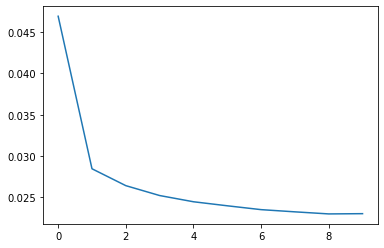

In [67]:
parameters = model(x_train, y_train, epochs=10, learning_rate=0.0001)

In [68]:
print(f'Accuracy in Train: {accuracy(x_train, y_train, parameters):.2f}%')
print(f'Accuracy in Test: {accuracy(x_test, y_test, parameters):.2f}%')

Accuracy in Train: 88.08%
Accuracy in Test: 86.45%
